# Probability Mass Functions

A **Probablity Mass Function** or (PMF) maps each value to its probability and offers another means to represent a distribution. A **probability** is a frequency expressed as a fraction of the sample size. To get from frequencies to probabilities, we divide thorugh by $n$, which is called **normalizaton**.

We can map values to probabilities with the Pmf calss provided by thinkstats2

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

/Users/Ian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [3]:
import thinkstats2
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

The Pmf is normalized so total probability is 1.

Pmf and Hist objects are very similar. The biggest distinction is that Hist maps from values to integer counters; Pmf maps from values to floating-point probabilities.

To look up the probability associated with the value, use Prob or an index/key:

In [4]:
pmf.Prob(2)
pmf[2]

0.4

You can modify an existing Pmf by incrementing (I think this means adding to?) the probability associated with a value:

In [5]:
pmf.Incr(2,0.2)
pmf.Prob(2)

0.6000000000000001

Or you can multiply a probability by a factor:


In [6]:
pmf.Mult(2,0.5)
pmf.Prob(2)

#But now the pmf is no longer normalized
pmf.Total()

0.8999999999999999

But you can re-normalize with Normalize() method.

In [7]:
pmf.Normalize()

pmf.Total()

1.0

Here's the code for Figure 3-1. Note, by plotting the PMF instead of the histogram, we **can compare the two distributions without being misled by the difference in sample size.**

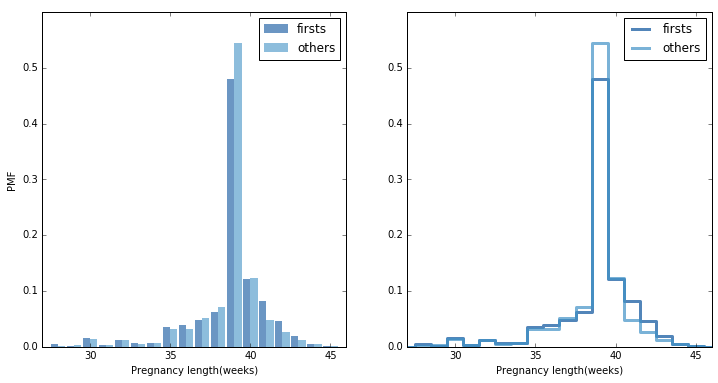

In [11]:
import thinkplot
import first

#can use MakeFrames to return DataFrames for all live births, first babies, and others.
live, firsts, others = first.MakeFrames()

first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)
#thinkplot.Show(xlabel='weeks',axis=axis)

# Other visualizations

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea of what is going on, a good next step is to design a visualization that makes the patterns you have identiifed as clear as possible.

In the NSFG data, the biggest differences in the distributions are ner the mode. So it makes sense to zoom in on that part of the graph and transform the data to emphasize the differences.

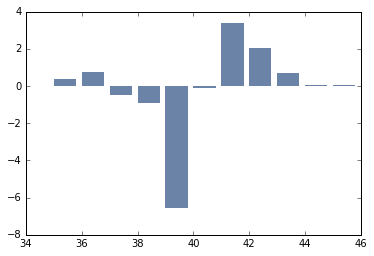

In [18]:
weeks = range(34,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    
thinkplot.Bar(weeks,diffs)

# The Class Size Paradox

This describes the phenomenom whereby students observe a larger class size than truly occurs. There are a more students in larger classes (by nature), than in smaller classes, so the typical students sees larger class sizes on average. In other words, it's more likely you will see students who have larger class sizes, because there are more of them. This phenomenom can be described by a "biased" PMF:

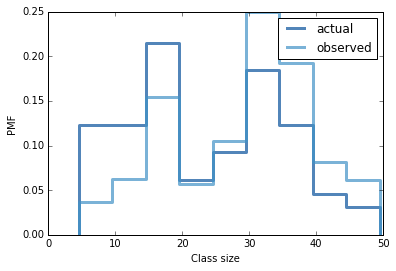

In [23]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

def BiasPmf(pmf,label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        #Multiply the probability by the number 
        #of students that observe the event
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf
    
biased_pmf = BiasPmf(pmf,'observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [26]:
biased_pmf[32]
print(biased_pmf.Mean())

29.1233766234


It's also possible to invert this operation. For instance, given what students report their observed average class size, you can use a modified PMF to esimate the actual distribution:

In [25]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmg.Items():
        new_pmf.Mult(x, 1.0/x)
    
    new_pmf.Normalize()
    return new_pmf

# Exercises

*Exercise 3-1*

In [27]:
resp = nsfg.ReadFemResp()
print(resp.columns)

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)


See chap03ex.ipynb for other work on exercises

# Glossary

*Probability mass function (PMF)*  
      A representation of a distribution as a function that maps from values to probabilities.
    
*probability*  
    A frequency expressed as a fraction of the sample size
    
*normalization*  
    The process of dividing a frequency by a sample size to get a probability

*index*  
    In a pandas DataFrame, the index is a special colun that contains the row labels